In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Asus20/Downloads/titanic.csv',index_col='PassengerId')

In [3]:
data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
male = 0
female = 0
for i in data['Sex']:
    if i == 'male':
        male += 1
    else:
        female += 1
print (male, 'мужчин и',female, 'женщин')


577 мужчин и 314 женщин


In [5]:
data.query("Pclass == 2")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [6]:
person = 0
for i in data['Pclass']:
    if i == 2:
         person += 1
print (person, 'путеществовали 2 классом')


184 путеществовали 2 классом


In [7]:
print('медиана',np.median(data.Fare).round(2), ', стандартное отклонение', np.std(data.Fare).round(2))

медиана 14.45 , стандартное отклонение 49.67


In [8]:
data.groupby('Survived').agg({'Age': 'mean'}) 
#print('Нет')

,Age
Survived,
0,30.626179
1,28.343690


In [9]:
data.Survived == 1

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Survived, Length: 891, dtype: bool

In [10]:
live = data.loc[data.Survived == 1, ['Age']]

In [11]:
live

,Age
PassengerId,
2,38.0
3,26.0
4,35.0
9,27.0
10,14.0
...,...
876,15.0
880,56.0
881,25.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13D055B0>]],
      dtype=object)

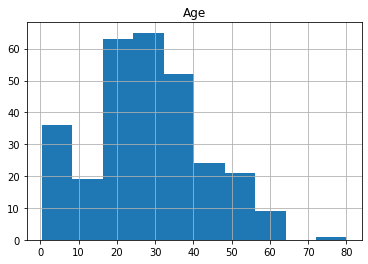

In [12]:
live.hist()

In [13]:
young = live.query('Age < 30').count()

In [14]:
old = live.query('Age > 30').count()

In [15]:
all_persons = 342

In [16]:
comp_young = young / all_persons
comp_old = old / all_persons
print(comp_young)
print(comp_old)


Age    0.45614
dtype: float64
Age    0.362573
dtype: float64


In [17]:
alive = data.loc[data.Survived == 1, ['Sex']]

In [18]:
alive

,Sex
PassengerId,
2,female
3,female
4,female
9,female
10,female
...,...
876,female
880,female
881,female


In [19]:
alive.Sex == 'female'

PassengerId
2       True
3       True
4       True
9       True
10      True
       ...  
876     True
880     True
881     True
888     True
890    False
Name: Sex, Length: 342, dtype: bool

In [20]:
female = alive.loc[alive.Sex == 'female'].count()
male = alive.loc[alive.Sex == 'male'].count()

In [21]:
comp_male = male / all_persons
comp_female = female / all_persons
print('мужчины', comp_male)
print('женщины', comp_female)

мужчины Sex    0.318713
dtype: float64
женщины Sex    0.681287
dtype: float64


In [22]:
alive = data.loc[data.Sex == 'male', ['Name']]

In [23]:
alive['Name'].value_counts()

Rood, Mr. Hugh Roscoe             1
Rosblom, Mr. Viktor Richard       1
Abbott, Mr. Rossmore Edward       1
Madsen, Mr. Fridtjof Arne         1
Klasen, Mr. Klas Albin            1
                                 ..
Kalvik, Mr. Johannes Halvorsen    1
Jacobsohn, Mr. Sidney Samuel      1
Sharp, Mr. Percival James R       1
O'Connell, Mr. Patrick D          1
Daniel, Mr. Robert Williams       1
Name: Name, Length: 577, dtype: int64

In [24]:
((data.Sex == 'male') & (data.Pclass == 1))

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890     True
891    False
Length: 891, dtype: bool

In [28]:
live = data.loc[data.Pclass == 1, ['Sex','Age']]


In [29]:
live

,Sex,Age,Pclass
PassengerId,,,
2,female,38.0,1
4,female,35.0,1
7,male,54.0,1
12,female,58.0,1
24,male,28.0,1
...,...,...,...
872,female,47.0,1
873,male,33.0,1
880,female,56.0,1


In [27]:
live.groupby('Sex').agg({'Age': 'mean'})

,Age
Sex,
female,34.611765
male,41.281386


In [33]:
a = data.groupby(['Sex', 'Pclass']).agg({'Age': 'mean'})

In [34]:
a

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589